In [1]:
import pandas as pd

In [60]:
import pandas as pd #training data the red animal and testing data the violet animal.. biji file lakh
import numpy as np  #https://stackoverflow.com/questions/51949736/classification-with-one-file-with-entirely-the-training-and-another-file-with-en
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns #seaborn is a very powerful library for data visualization


df = pd.read_csv('acceleration_comportement_rouge.csv')
df_test = pd.read_csv('acceleration_comportement_violette.csv')

In [61]:
df.keys()

Index(['Compas', 'Pitch', 'Roll', 'AccX', 'AccY', 'AccZ', 'Timer2', 'temps',
       'Comportement'],
      dtype='object')

In [62]:
df_test.keys()

Index(['Compas', 'Pitch', 'Roll', 'AccX', 'AccY', 'AccZ', 'Timer2', 'temps',
       'Comportement'],
      dtype='object')

In [63]:
df.isna().any()

Compas          False
Pitch           False
Roll            False
AccX            False
AccY            False
AccZ            False
Timer2          False
temps           False
Comportement     True
dtype: bool

In [64]:
df['Comportement']= df['Comportement'].fillna('other')

In [65]:
df.isna().any()

Compas          False
Pitch           False
Roll            False
AccX            False
AccY            False
AccZ            False
Timer2          False
temps           False
Comportement    False
dtype: bool

In [66]:
df_test.isna().any()

Compas          False
Pitch           False
Roll            False
AccX            False
AccY            False
AccZ            False
Timer2          False
temps           False
Comportement     True
dtype: bool

In [67]:
df_test['Comportement']= df_test['Comportement'].fillna('other')

In [68]:
df_test.isna().any()

Compas          False
Pitch           False
Roll            False
AccX            False
AccY            False
AccZ            False
Timer2          False
temps           False
Comportement    False
dtype: bool

In [69]:
X = df.drop('Comportement',axis = 1).values
y = df['Comportement'].values

xt = df_test.drop('Comportement',axis = 1).values
yt = df_test['Comportement'].values

Xtrain, Ytrain = X, y
Xtest, Ytest = xt, yt

In [70]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(Xtrain, Ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [74]:
y_predict = svc_model.predict(Xtest)
sm = confusion_matrix(Ytest, y_predict)
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [75]:
sm

array([[    0,     0,     0,     0,   506,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0, 28712,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,   457,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,  5169,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0, 41120,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,   571,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,    26,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,   109,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0, 28331,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,  1698,     0,     0,     0,     0,
            0,     0

In [73]:
print(classification_report(Ytest, y_predict))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         A_T       0.00      0.00      0.00       506
           B       0.00      0.00      0.00     28712
       D_S_S       0.00      0.00      0.00       457
      D_S_TH       0.00      0.00      0.00      5169
      D_S_TI       0.36      1.00      0.52     41120
      D_S_TV       0.00      0.00      0.00       571
         M_B       0.00      0.00      0.00        26
         M_C       0.00      0.00      0.00       109
         M_M       0.00      0.00      0.00     28331
         M_T       0.00      0.00      0.00      1698
           N       0.00      0.00      0.00      8740
       other       0.00      0.00      0.00       203

    accuracy                           0.36    115642
   macro avg       0.03      0.08      0.04    115642
weighted avg       0.13      0.36      0.19    115642



In [76]:
# LETS IMPROVE THE MODEL
min_train = Xtrain.min()
min_train

-32768.0

In [77]:
range_train = (Xtrain - min_train).max()
range_train

102977.0

In [78]:
X_train_scaled = (Xtrain - min_train)/range_train

In [79]:
min_test = Xtest.min()
range_test = (Xtest - min_test).max()
X_test_scaled = (Xtest - min_test)/range_test

In [80]:
svc_model1 = SVC()
svc_model1.fit(X_train_scaled, Ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

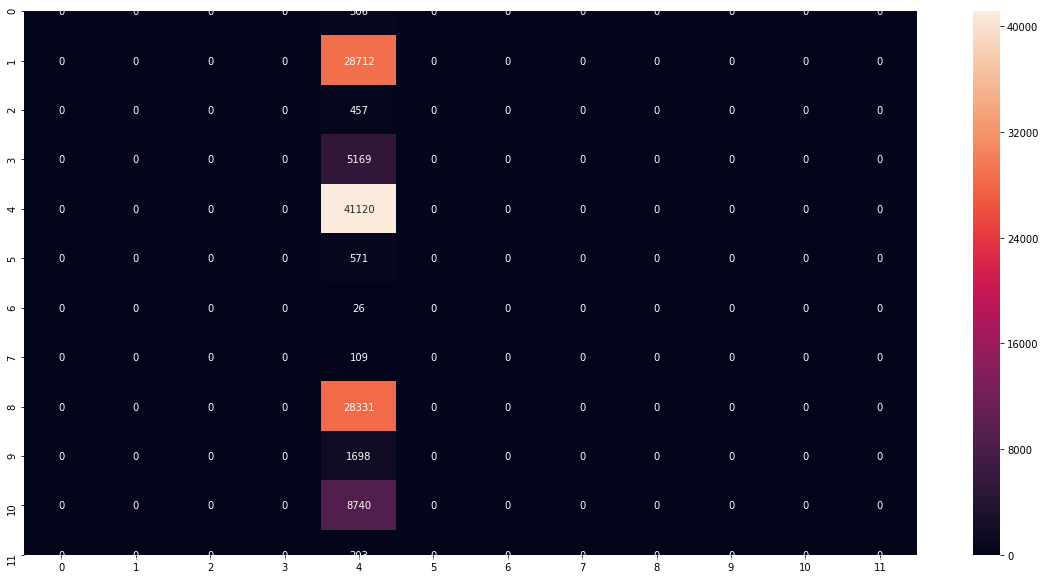

In [81]:
y_predict1 = svc_model1.predict(X_test_scaled)
qm = confusion_matrix(Ytest, y_predict1)

plt.figure(figsize=(20,10))
sns.heatmap(qm,annot=True,fmt="d")

In [82]:
print(classification_report(Ytest,y_predict1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         A_T       0.00      0.00      0.00       506
           B       0.00      0.00      0.00     28712
       D_S_S       0.00      0.00      0.00       457
      D_S_TH       0.00      0.00      0.00      5169
      D_S_TI       0.36      1.00      0.52     41120
      D_S_TV       0.00      0.00      0.00       571
         M_B       0.00      0.00      0.00        26
         M_C       0.00      0.00      0.00       109
         M_M       0.00      0.00      0.00     28331
         M_T       0.00      0.00      0.00      1698
           N       0.00      0.00      0.00      8740
       other       0.00      0.00      0.00       203

    accuracy                           0.36    115642
   macro avg       0.03      0.08      0.04    115642
weighted avg       0.13      0.36      0.19    115642



In [83]:
#LETS TRY TO IMPROVE THE MODEL ONE MORE TIME
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [86]:
grid.fit(X_train_scaled,Ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.636, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.636, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.636, total=   2.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.636, total=   2.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.636, total=   2.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.636, total=   2.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.636, total=   2.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.636, total=   2.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.636, total=   2.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.636, total=   2.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [87]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [88]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
grid_predictions = grid.predict(X_test_scaled)

In [90]:
wm = confusion_matrix(Ytest, grid_predictions)

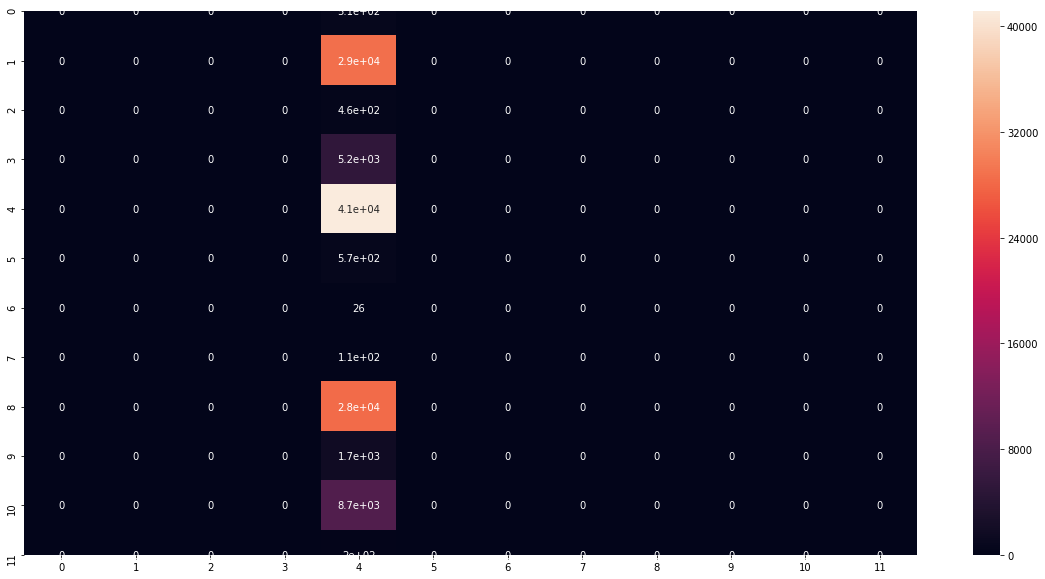

In [91]:
plt.figure(figsize=(20,10))
sns.heatmap(wm, annot=True)

In [92]:
print(classification_report(Ytest,grid_predictions))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         A_T       0.00      0.00      0.00       506
           B       0.00      0.00      0.00     28712
       D_S_S       0.00      0.00      0.00       457
      D_S_TH       0.00      0.00      0.00      5169
      D_S_TI       0.36      1.00      0.52     41120
      D_S_TV       0.00      0.00      0.00       571
         M_B       0.00      0.00      0.00        26
         M_C       0.00      0.00      0.00       109
         M_M       0.00      0.00      0.00     28331
         M_T       0.00      0.00      0.00      1698
           N       0.00      0.00      0.00      8740
       other       0.00      0.00      0.00       203

    accuracy                           0.36    115642
   macro avg       0.03      0.08      0.04    115642
weighted avg       0.13      0.36      0.19    115642



In [93]:
print("Thus, based on the BEST accuracy, we can decide which k value is BEST to predict BEST!!!")
print("                                                                                        ")

k = 3

scores = {}
scores_list = []
classes = {0:'D_S_TI',1:'D_S_S',2:'D_S_TH',3:'M_M',4:'D_S_TV',5:'NA',6:'D_S_TV',7:'M_T',8:'B',9:'N',10:'other'}

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain,Ytrain)
y_pred = knn.predict(Xtest)
scores[k] = metrics.accuracy_score(Ytest,y_pred)
scores_list.append(metrics.accuracy_score(Ytest,y_pred))
#print("Predicted Behaviour:", classes[y_pred[k]])
print(  "Test value :",Ytest,"Predicted Value: {}".format(y_pred),"Accuracy score:",scores_list)

Thus, based on the BEST accuracy, we can decide which k value is BEST to predict BEST!!!
                                                                                        
Test value : ['B' 'B' 'B' ... 'B' 'B' 'B'] Predicted Value: ['D_S_TI' 'D_S_TI' 'D_S_TI' ... 'D_S_TH' 'D_S_TH' 'D_S_TH'] Accuracy score: [0.20150118469068332]


In [96]:
print("Thus, based on the BEST accuracy, we can decide which k value is BEST to predict BEST!!!")
print("                                                                                        ")

k = 9

scores = {}
scores_list = []
classes = {0:'D_S_TI',1:'D_S_S',2:'D_S_TH',3:'M_M',4:'D_S_TV',5:'NA',6:'D_S_TV',7:'M_T',8:'B',9:'N',10:'other'}

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain,Ytrain)
y_pred = knn.predict(Xtest)
scores[k] = metrics.accuracy_score(Ytest,y_pred)
scores_list.append(metrics.accuracy_score(Ytest,y_pred))
#print("Predicted Behaviour:", classes[y_pred[k]])
print(  "Test value :",Ytest,"Predicted Value: {}".format(y_pred),"Accuracy score:",scores_list)

Thus, based on the BEST accuracy, we can decide which k value is BEST to predict BEST!!!
                                                                                        
Test value : ['B' 'B' 'B' ... 'B' 'B' 'B'] Predicted Value: ['D_S_TI' 'D_S_TI' 'D_S_TI' ... 'D_S_TH' 'D_S_TH' 'D_S_TH'] Accuracy score: [0.21801767523909998]


In [97]:
print("Thus, based on the BEST accuracy, we can decide which k value is BEST to predict BEST!!!")
print("                                                                                        ")

k = 5

scores = {}
scores_list = []
classes = {0:'D_S_TI',1:'D_S_S',2:'D_S_TH',3:'M_M',4:'D_S_TV',5:'NA',6:'D_S_TV',7:'M_T',8:'B',9:'N',10:'other'}

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain,Ytrain)
y_pred = knn.predict(Xtest)
scores[k] = metrics.accuracy_score(Ytest,y_pred)
scores_list.append(metrics.accuracy_score(Ytest,y_pred))
#print("Predicted Behaviour:", classes[y_pred[k]])
print(  "Test value :",Ytest,"Predicted Value: {}".format(y_pred),"Accuracy score:",scores_list)

Thus, based on the BEST accuracy, we can decide which k value is BEST to predict BEST!!!
                                                                                        
Test value : ['B' 'B' 'B' ... 'B' 'B' 'B'] Predicted Value: ['D_S_TI' 'D_S_TI' 'D_S_TI' ... 'D_S_TH' 'D_S_TH' 'D_S_TH'] Accuracy score: [0.21583853617197904]


Thus, based on the BEST accuracy, we can decide which k value is BEST to predict BEST!!!


Text(0, 0.5, 'Testing Accuracy')

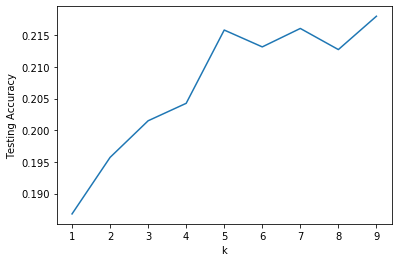

In [94]:
k_range = range(1,10) #we test till 15 nearest neighbors
scores = {}
scores_list = []
classes = {0:'D_S_TI',1:'D_S_S',2:'D_S_TH',3:'M_M',4:'D_S_TV',5:'NA',6:'D_S_TV',7:'M_T',8:'B',9:'N',10:'other'}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain,Ytrain)
    y_pred = knn.predict(Xtest)
    scores[k] = metrics.accuracy_score(Ytest,y_pred)
    scores_list.append(metrics.accuracy_score(Ytest,y_pred))

print("Thus, based on the BEST accuracy, we can decide which k value is BEST to predict BEST!!!")
plt.plot(k_range,scores_list)
#plt.style.use('ggplot')
plt.xlabel('k')
plt.ylabel('Testing Accuracy')

In [95]:
print(classification_report(Ytest,y_pred)) #f1score? support? #recall(hit rate) etle true positive rate = Σ True positive / Σ Condition positive
# precision etle Positive predictive value = Σ True positive / Σ Predicted condition positive
# accuracy etle = (Σ True positive + Σ True negative ) / Σ Total population
# support col jo.. 113 B class na eles che,pachi D_S_S class na 78 ele che.. em keva mange che ne ovverall 6814 eles che je 50% of the data par j test thay chene etle classification report bi khali testing data mate j hoi

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         A_T       0.00      0.00      0.00       506
           B       0.01      0.00      0.00     28712
       D_S_S       0.00      0.00      0.00       457
      D_S_TH       0.05      0.30      0.09      5169
      D_S_TI       0.35      0.24      0.29     41120
      D_S_TV       0.00      0.00      0.00       571
         M_B       0.00      0.00      0.00        26
         M_C       0.00      0.00      0.00       109
         M_M       0.24      0.48      0.32     28331
         M_T       0.02      0.00      0.00      1698
           N       0.00      0.00      0.00      8740
       other       0.00      0.00      0.00       203

    accuracy                           0.22    115642
   macro avg       0.06      0.09      0.06    115642
weighted avg       0.19      0.22      0.18    115642



In [98]:
#f1 score etle the bbalanced f score etle harmonicmean(etle mean of the speeds) between precision and recall
# 2(precision * recall) / (precision + recall) pan e indicate shu kare?
# In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy.
# t considers both the precision p and the recall r of the test to compute the score.
#The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

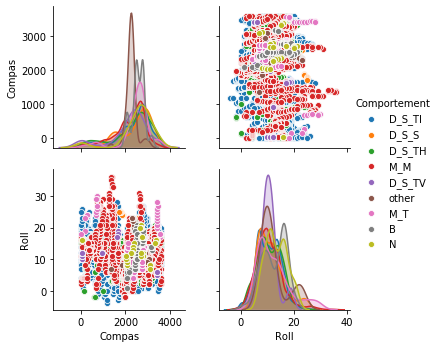

In [99]:
sns.pairplot(df, hue='Comportement', vars = ['Compas','Roll']) #the graphs show the relation between these two features

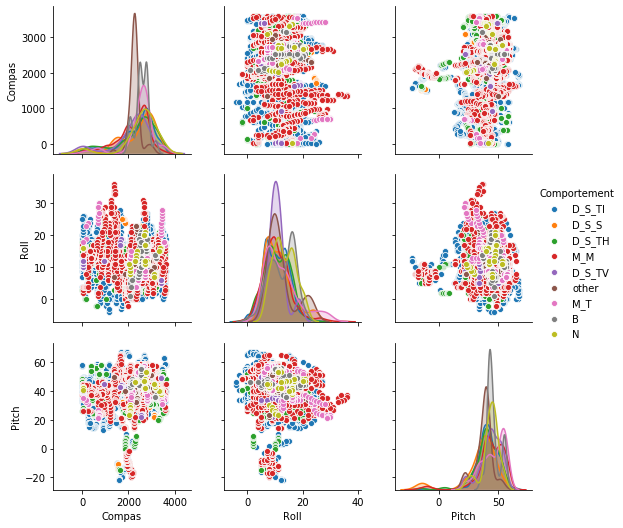

In [100]:
sns.pairplot(df, hue='Comportement', vars = ['Compas','Roll','Pitch']) #shows which bbehaviour of the animals is the most seperable.

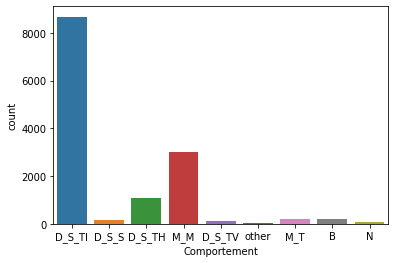

In [101]:
# now we wanna count how many samples are of which which behaviour so we now use countplot
sns.countplot(df['Comportement']) #we see that the animal behaved D_S_T1 the highest

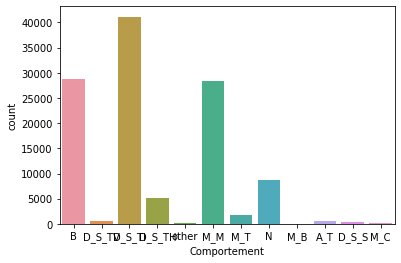

In [102]:
# now we wanna count how many samples are of which which behaviour so we now use countplot
sns.countplot(df_test['Comportement']) #we see that the animal behaved D_S_T1 the highest

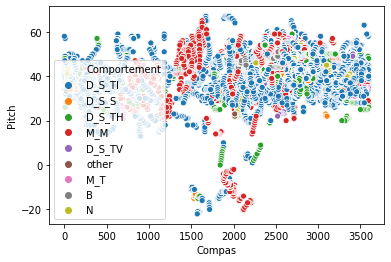

In [103]:
sns.scatterplot(x='Compas', y='Pitch',hue='Comportement',data = df)

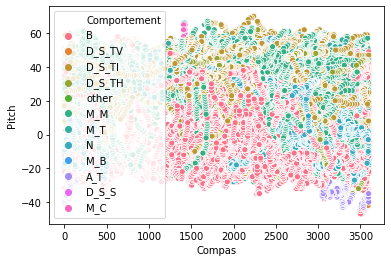

In [104]:
sns.scatterplot(x='Compas', y='Pitch',hue='Comportement',data = df_test)

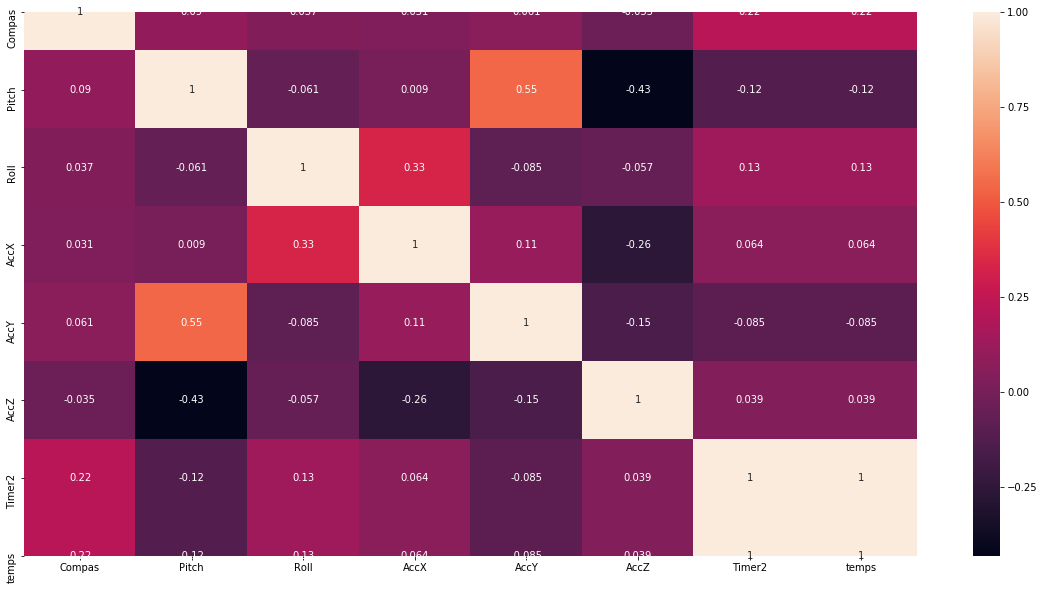

In [106]:
#now we want to see how the features are corelated..
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True) #the scale alongside the figure indicates the highness of the correlation between the two features

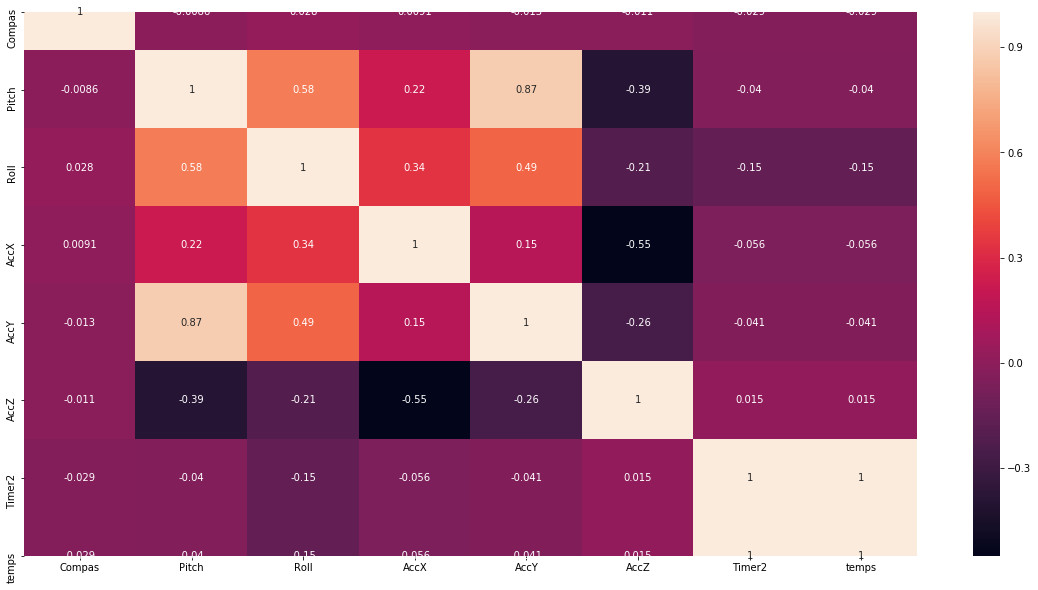

In [115]:
#now we want to see how the features are corelated..
plt.figure(figsize=(20,10)) # accha achha aa plot correlation batave che heatmap format ma..a confusion matrix nathi
sns.heatmap(df_test.corr(),annot=True) #the scale alongside the figure indicates the highness of the correlation between the two features

In [113]:
cm = confusion_matrix(Ytest, y_pred)#knn mate che bbecause y_pred che

In [114]:
cm #aa confusion matrix ma each column ek class ne refer kare che..ovverall diagnols ma je che e correctly predicted che ne bija misscorrectly

array([[    0,    23,     0,     7,   373,     0,     0,     0,   103,
            0,     0,     0],
       [    0,     2,    28,  3093,  7412,     0,     0,     0, 18177,
            0,     0,     0],
       [    0,     2,     0,   137,    65,     0,     0,     0,   253,
            0,     0,     0],
       [    0,    68,     2,  1597,  1459,     0,     0,     0,  1997,
           46,     0,     0],
       [    0,   263,     3, 15805,  9977,     2,     0,     0, 14772,
          296,     2,     0],
       [    0,     8,     0,    57,   367,     0,     0,     0,   139,
            0,     0,     0],
       [    0,     0,     0,     4,     3,     0,     0,     0,    19,
            0,     0,     0],
       [    0,     0,     0,     3,    74,     0,     0,     0,    32,
            0,     0,     0],
       [    0,    67,     2,  9084,  5747,     1,     0,     0, 13366,
           64,     0,     0],
       [    0,     1,     0,   433,   490,     0,     0,     0,   756,
           18,     0

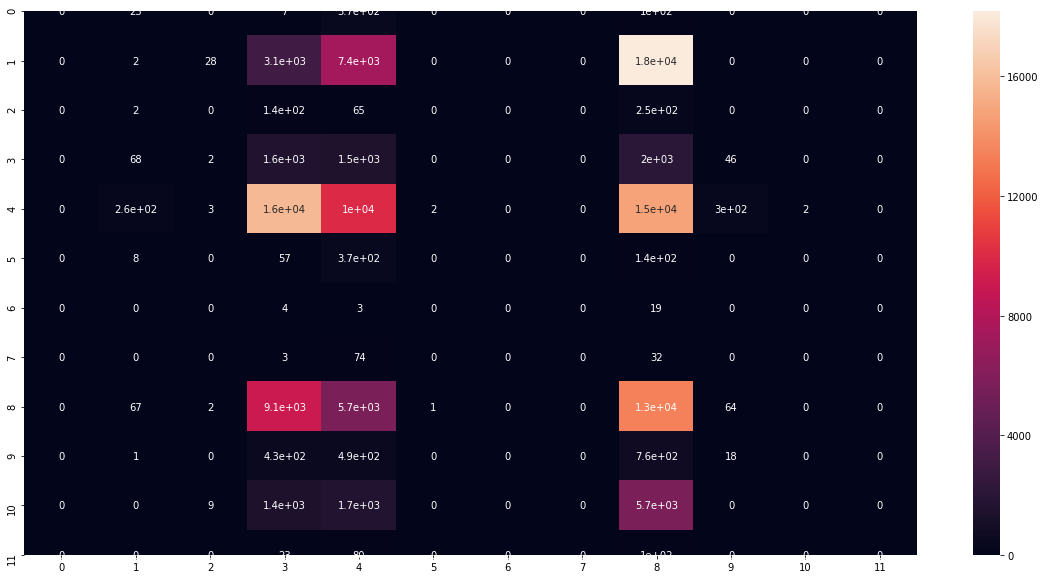

In [116]:
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True) #confusion matrix ? https://www.youtube.com/watch?v=HBi-P5j0Kec Make notes out of this.

In [117]:
#svc ne grid search kam kevvi rite kare? ane bracket ma e banne nu je description hoi e parameters su che? Also,grid ma fit kariye pachi shu report 
#generate thay che? param grid shu che? ane svc ne gridsearch improve kevi rite kare che training process ne!!!??

In [ ]:
#time series..current and the past vvalues to compuute current output..maybe window of 10 rows..take into account the continuity of time..